In [1]:
import numpy as np
from env.gridWorld import GridworldEnv

In [2]:
env = GridworldEnv()
obs_dim = env.nS
action_dim = env.nA
print(f"obs_dim:{obs_dim},action_dim:{action_dim}")

obs_dim:16,action_dim:4


In [3]:
random_policy = np.ones([obs_dim, action_dim]) / action_dim
print(f"random_policy:{random_policy}")

random_policy:[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


In [4]:
def policy_eval(policy, env, discount_factor, theta):
    values = np.zeros(obs_dim)
    while True:
        delta = 0
        for obs in range(obs_dim):
            expect_value= 0
            for action, action_prob in enumerate(random_policy[obs]):
                for state_prob, next_state, reward, done in env.P[obs][action]:
                    expect_value += action_prob*state_prob*(reward+discount_factor*values[next_state])
            delta = max(delta, np.abs(expect_value - values[obs]))
            values[obs] = expect_value
        if delta < theta:
            break
    return values

#### 策略评估
+ 定义：已知马尔可夫决策过程和策略$\pi$，计算价值函数$V_{\pi}(s)$的过程
+ 策略评估公式：$V(s) \leftarrow \sum_a \pi(s, a) \sum_{s^{\prime}} \mathcal{P}_{s s^{\prime}}^a\left[\mathcal{R}_{s s^{\prime}}^a+\gamma V\left(s^{\prime}\right)\right]$

In [5]:
def one_step_lookahead(state, V, discount_factor):
    Q_values = np.zeros(action_dim)
    for action in range(action_dim):
        for prob, next_state, reward, done in env.P[state][action]:
            Q_values[action] += prob*(reward + discount_factor*V[next_state])
    return Q_values

In [6]:
def policy_iteration(env, eval_policy_func, discount_factor, theta):
    policy = random_policy
    while True:
        values = eval_policy_func(policy, env, discount_factor, theta)
        police_stable = True
        
        for state in range(obs_dim):
            now_best_choosen_action = np.argmax(policy[state])
            expect_best_action = np.argmax(one_step_lookahead(state, values, discount_factor))
            
            # greedily update the policy
            if now_best_choosen_action != expect_best_action:
                police_stable = False
            policy[state] = np.eye(action_dim)[expect_best_action]
        
        if police_stable:
            return policy, values

#### 策略迭代
+ 定义:已知马尔可夫决策过程，不断迭代优化得到最优策略的过程
+ 迭代步骤：
    + 策略评估：迭代收敛获得当前策略下所有状态的准确状态价值$V(s)$
    + 策略改进：根据上一步获得的准确$V(s)$，得到所有状态下的最优动作并更新策略
    + 重复上述两个过程，直到策略收敛平稳
    + 策略改进公式：$\pi(s) \leftarrow \arg \max _a \sum_{s^{\prime}} p\left(s^{\prime} \mid s, a\right)[r\left(s, a, s^{\prime}\right)+\gamma v\left(s^{\prime}\right)]$

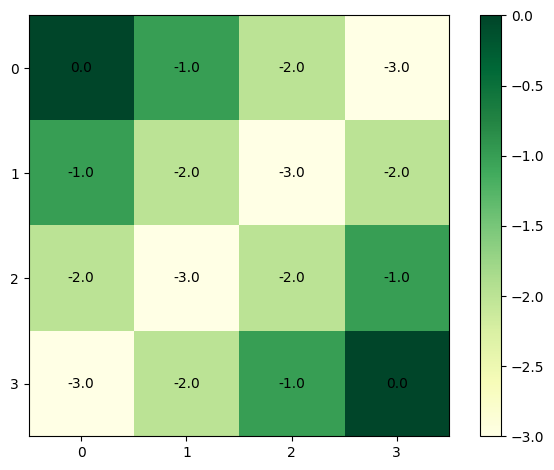

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [7]:
import matplotlib.pyplot as plt

def plot_values(values):  
    fig, ax = plt.subplots()
    ax.set_xticks(range(len(values)))
    ax.set_yticks(range(len(values[0])))
    im = ax.imshow(values, cmap="YlGn")
    plt.colorbar(im)
    
    for i in range(len(values)):
        for j in range(len(values[0])):
            ax.text(j, i, np.round(values[i][j], 1), ha="center", va="center", color="black")
    
    fig.tight_layout()
    plt.show()
    
policy, values = policy_iteration(env, policy_eval, 1.0, 1e-5)
values = values.reshape(env.shape)
plot_values(values)
print(policy)